# Lab-1. Way optimization algorythm.

Реализация алгоритма 2opt swap.

Выполнил: Прошак Никита

In [1]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotter(points, ax_):
    points = np.vstack([points, points[0]])
    x, y = points.T
    ax_.plot(x, y)

In [3]:
def initialize_routes(count=10, s_ = 10):
    return np.random.rand(count, 2) * s_

In [4]:
def get_distance(p_1, p_2):
    return (sum((p_1 - p_2) ** 2))**0.5

In [5]:
def create_route(points, l_):
    return np.array([points[_] for _ in l_])

In [6]:
def get_energy(points, l_):
    e = 0
    c_list = create_route(points, l_)
    for i in range(len(l_) - 1):
        e += get_distance(c_list[i], c_list[i+1])
    e += get_distance(c_list[0], c_list[1])
    return e

In [7]:
def _2_opt_swap_(l_):
    l_copy = deepcopy(l_)
    i, j = sorted(np.random.randint(len(l_copy), size=2))
    l_copy[i:j+1] = l_copy[i:j+1][::-1]
    return l_copy

In [8]:
def get_probability(d_e, t):
    return np.exp(-1* d_e/t)

In [9]:
def is_trans(p):
    return p > np.random.rand(1)

In [10]:
def t_decrease(t, k):
    return t * 0.1 / k

In [11]:
# 2-opt-swap optimization
def optimization(points, low_t, end_t, max_iter = 100000):
    t = low_t
    route = list(range(len(points)))
    e = get_energy(points, route)
    print(f"At the beginning length is {e}")
    for i in range(1, max_iter):
        new_r = _2_opt_swap_(route)
        new_e = get_energy(points, new_r)
        if new_e < e:
            route = new_r
            e = new_e
        elif is_trans(get_probability(new_e - e, t)):
            route = new_r
            e = new_e
        t = t_decrease(low_t, i)
        if t <= end_t:
            break
    print(f"End length is {e}")
    return route

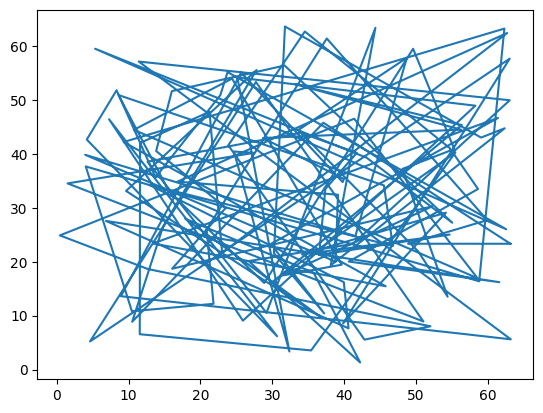

In [12]:
# constants
COUNT = 128
SIZE = 64
T_BEGIN = 120
T_END = 0

points = initialize_routes(COUNT, SIZE)
figure, ax = plt.subplots(1)
plotter(points, ax)

At the beginning length is 3871.5833032202036
End length is 547.7897016620425
CPU times: total: 1min 2s
Wall time: 3min 43s


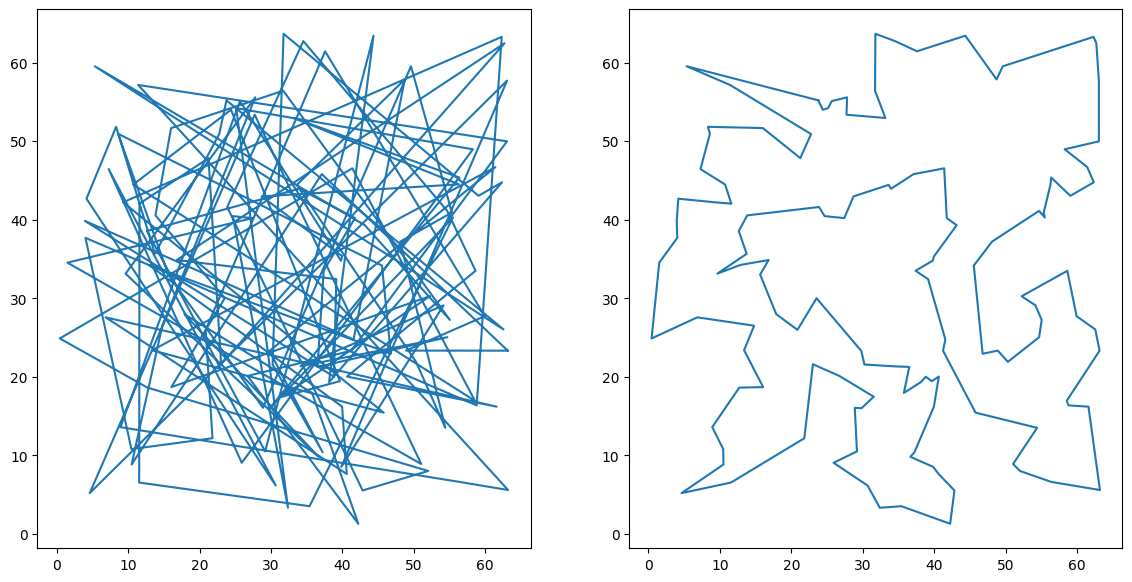

In [13]:
%%time
route = optimization(points, T_BEGIN, T_END)
routed_points = create_route(points, route)
fig, ax = plt.subplots(1, 2)
plotter(points, ax[0])
plotter(routed_points, ax[1])
fig.set_size_inches(14, 7)